In [1]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
from bs4 import BeautifulSoup as bs
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
import time
from tqdm import tqdm_notebook as tqdm
import requests as req
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 17, 8
rcParams['font.family'] ='Malgun Gothic'

In [13]:
test2 = pd.read_csv('trend.csv', encoding = 'utf-8',index_col='date')
test2

,corona,capsule,machine
date,,,
2018-01-01,0.00760,14.94429,26.77910
2018-01-02,0.00909,16.51940,34.91785
2018-01-03,0.00825,17.71033,35.31166
2018-01-04,0.00927,16.90357,29.87390
2018-01-05,0.00900,14.25278,25.96364
...,...,...,...
2022-02-24,10.66069,50.94122,51.58518
2022-02-25,8.07788,42.91202,42.51163
2022-02-26,6.00255,51.32539,38.14391


In [3]:
test = pd.read_csv('C_H_relation.csv', encoding = 'utf-8')
test = test.set_index(keys=['날짜'], inplace =False, drop = True)
test

,코로나,홈까페,커피머신
날짜,,,
2019-09-27,0.00915,29.62962,22.09309
2019-09-28,0.00858,32.80423,21.63281
2019-09-29,0.00858,35.44973,24.61308
2019-09-30,0.00880,35.97883,27.32293
2019-10-01,0.00786,23.80952,25.82705
...,...,...,...
2022-09-23,0.99565,14.28571,26.50595
2022-09-24,0.63198,12.16931,24.65911
2022-09-25,0.64692,16.40211,31.32731


In [14]:
test2.corr()

,corona,capsule,machine
corona,1.000000,0.484159,0.542067
capsule,0.484159,1.000000,0.743205
machine,0.542067,0.743205,1.000000


<AxesSubplot:>

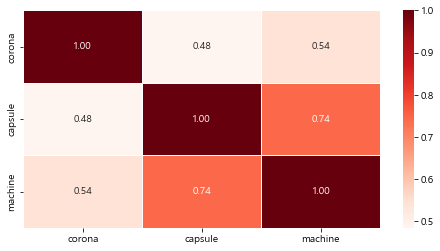

In [23]:
plt.figure(figsize=(8,4))
sns.heatmap(data = test2.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Reds')
# r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,
#r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,
#r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,
#r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,
#r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,
#r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,
#r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계